In [1]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm as cm

#### Boolean functions of 3 variables

In [2]:
def bitfield(n):
    return [int(digit) for digit in bin(n)[2:]] 

In [3]:
functions = []
for i in range(0, 256):
    part = bitfield(i)
    temp = ([0]*(8-len(part)))
    temp.extend(part)
    functions.append(temp)

In [4]:
with open(r'all_functions_3.txt', 'w') as out:
    for f in functions:
        print(f, file=out)

#### Functions with maximum component algebraic immunity

In [5]:
import ast

In [6]:
path_vectorial = r'AIcomp2_n3.txt'
vectorial = []
with open(path_vectorial, 'r') as f:
    for line in f.readlines():
        func = ast.literal_eval(line.rstrip())
        vectorial.append(func)

In [7]:
vectorial

[[0, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 1, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 1, 1],
 [0, 1, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 0, 1, 0],
 [1, 0, 0, 1, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 1, 1, 0],
 [1, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 1, 1, 0],
 [1, 1, 0, 1, 0, 0, 1, 0]]

In [8]:
df_all = pd.DataFrame(data=functions)
df_all.head()

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0


In [9]:
df_vectorial = pd.DataFrame(data=vectorial)
df_vectorial

,0,1,2,3,4,5,6,7
0,0,0,1,0,1,1,0,1
1,0,0,1,1,1,0,0,1
2,0,1,0,0,1,0,1,1
3,0,1,0,1,1,0,0,1
4,0,1,1,0,0,0,1,1
5,0,1,1,0,0,1,0,1
6,1,0,0,1,1,0,1,0
7,1,0,0,1,1,1,0,0
8,1,0,1,0,0,1,1,0
9,1,0,1,1,0,1,0,0


#### Add class labels

1 - with maximum component algebraic immunity

0 - else

In [10]:
df_all['class'] = 0

In [11]:
for i, row in df_vectorial.iterrows():
    for j, row1 in df_all.iterrows():
        ok = True
        for k in range(0, 8):
            if row[k] != row1[k]:
                ok = False
                break
        if ok:
            df_all.loc[j, 'class'] = 1

In [12]:
df_all[df_all['class'] == 1]

,0,1,2,3,4,5,6,7,class
45,0,0,1,0,1,1,0,1,1
57,0,0,1,1,1,0,0,1,1
75,0,1,0,0,1,0,1,1,1
89,0,1,0,1,1,0,0,1,1
99,0,1,1,0,0,0,1,1,1
101,0,1,1,0,0,1,0,1,1
154,1,0,0,1,1,0,1,0,1
156,1,0,0,1,1,1,0,0,1
166,1,0,1,0,0,1,1,0,1
180,1,0,1,1,0,1,0,0,1


#### Dimensional visualization

In [13]:
def draw_3d(func_all, func_vector):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in func_all:
        if f in func_vector:
            ax.scatter(f[0], f[1], f[2], c='r')
        else:
            ax.scatter(f[0], f[1], f[2], c='b')

    plt.show()

In [14]:
def draw_2d(func_all, func_vector):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)

    for f in func_all:
        if f in func_vector:
            ax.scatter(f[0], f[1], c='r')
        else:
            ax.scatter(f[0], f[1], c='b')

    plt.show()

In [15]:
def draw_1d(func_all, func_vector):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)

    for f in func_all:
        if f in func_vector:
            ax.scatter(f[0], 1, c='r')
        else:
            ax.scatter(f[0], 1, c='b')

    plt.show()

#### PCA

In [16]:
columns_to_fit = [i for i in range(0, 8)]

In [17]:
from sklearn.decomposition import PCA

In [18]:
model = PCA(n_components=3)
model.fit(df_all[columns_to_fit])
functions_transformed_3 = model.transform(df_all[columns_to_fit])
vectorial_transformed_3 = model.transform(df_vectorial[columns_to_fit])

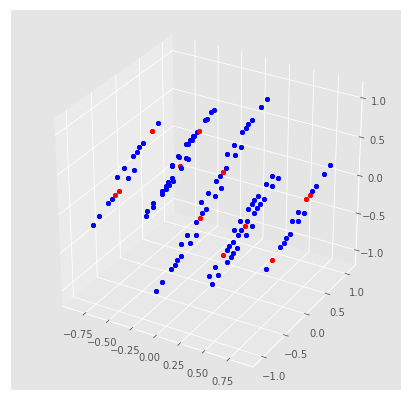

In [19]:
draw_3d(functions_transformed_3, vectorial_transformed_3)

#### Visualization of the only first half of target functions

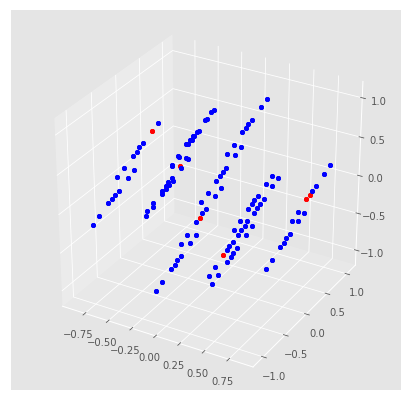

In [20]:
draw_3d(functions_transformed_3, vectorial_transformed_3[:6])

In [21]:
model = PCA(n_components=2)
model.fit(df_all[columns_to_fit])
functions_transformed_2 = model.transform(df_all[columns_to_fit])
vectorial_transformed_2 = model.transform(df_vectorial[columns_to_fit])

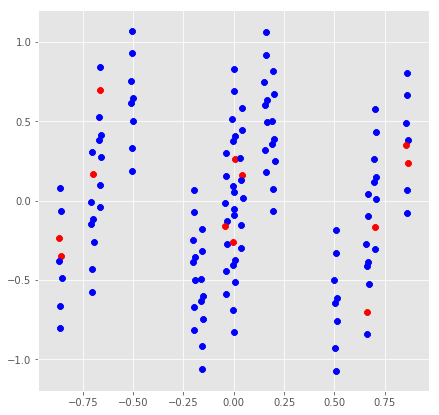

In [22]:
draw_2d(functions_transformed_2, vectorial_transformed_2)

In [23]:
model_1 = PCA(n_components=1)
model_1.fit(df_all[columns_to_fit])
functions_transformed = model_1.transform(df_all[columns_to_fit])
vectorial_transformed = model_1.transform(df_vectorial[columns_to_fit])

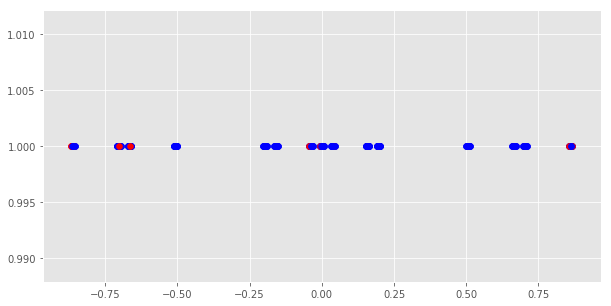

In [24]:
draw_1d(functions_transformed, vectorial_transformed)

#### TSNE

In [25]:
import seaborn as sns

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_all_results = tsne.fit_transform(df_all[columns_to_fit])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.001s...
[t-SNE] Computed neighbors for 256 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.747899
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.423912
[t-SNE] KL divergence after 300 iterations: 3.232979


In [28]:
df_all['tsne-3d-0'] = tsne_all_results[:, 0]
df_all['tsne-3d-1'] = tsne_all_results[:, 1]
df_all['tsne-3d-2'] = tsne_all_results[:, 2]

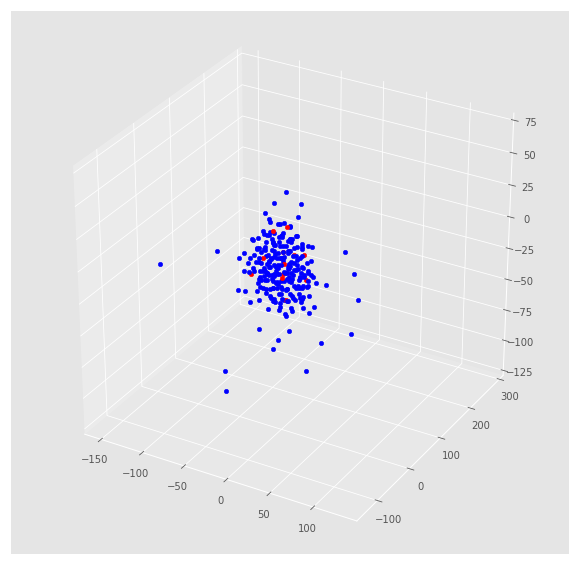

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, f in df_all.iterrows():
    c = 'r' if f['class'] else 'b'
    ax.scatter(f['tsne-3d-0'], f['tsne-3d-1'], f['tsne-3d-2'], c=c)
plt.show()

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_all_results = tsne.fit_transform(df_all[columns_to_fit])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.000s...
[t-SNE] Computed neighbors for 256 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.747899
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.116596
[t-SNE] KL divergence after 300 iterations: 1.367476


In [31]:
df_all['tsne-2d-0'] = tsne_all_results[:, 0]
df_all['tsne-2d-1'] = tsne_all_results[:, 1]

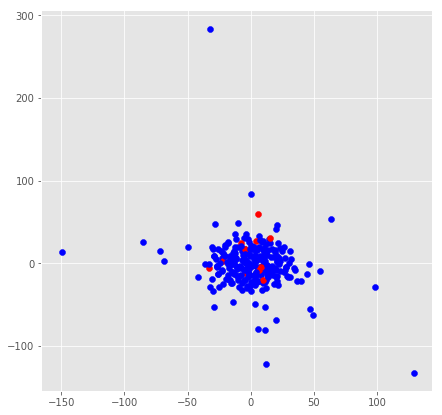

In [32]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for i, f in df_all.iterrows():
    c = 'r' if f['class'] else 'b'
    ax.scatter(f['tsne-3d-0'], f['tsne-3d-1'], c=c)
plt.show()

#### TSNE on PCA

In [33]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_all_results = tsne.fit_transform(functions_transformed_3)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.000s...
[t-SNE] Computed neighbors for 256 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.424384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.358109
[t-SNE] KL divergence after 300 iterations: 2.366617


In [34]:
#%matplotlib notebook
#from mpl_toolkits.mplot3d import axes3d  

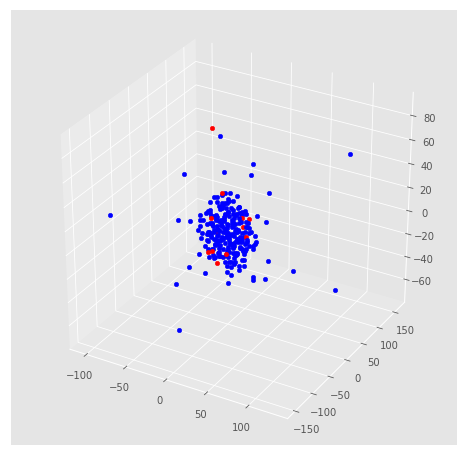

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i, res in enumerate(tsne_all_results):
    if df_all.iloc[i]['class'] == 1:
        ax.scatter(res[0], res[1], res[2], c='r')
    else:
        ax.scatter(res[0], res[1], res[2],  c='b')

plt.show()

In [36]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_all_results = tsne.fit_transform(functions_transformed_3)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.000s...
[t-SNE] Computed neighbors for 256 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.424384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.457352
[t-SNE] KL divergence after 300 iterations: 2.297149


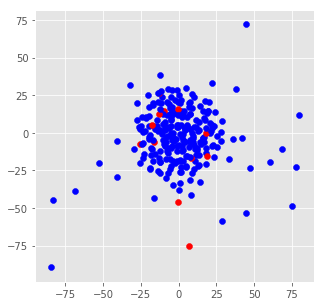

In [37]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for i, res in enumerate(tsne_all_results):
    if df_all.iloc[i]['class'] == 1:
        ax.scatter(res[0], res[1], c='r')
    else:
        ax.scatter(res[0], res[1],  c='b')

plt.show()

#### Compute sum and multiplication by all subsets

In [38]:
import itertools

In [39]:
def C(n, k):
    return list(itertools.combinations(range(0, n), k))

In [40]:
n = 8
for k in range(2, 8):
    combs = C(n, k)
    for comb in combs:
        name = ''.join(str(i) for i in comb)
        df_all[f'{name}_sum'] = df_all[list(comb)].any(axis=1).astype('int')
        df_all[f'{name}_mult'] = df_all[list(comb)].all(axis=1).astype('int')

In [41]:
df_all.head()

,0,1,2,3,4,5,6,7,class,tsne-3d-0,...,0123567_sum,0123567_mult,0124567_sum,0124567_mult,0134567_sum,0134567_mult,0234567_sum,0234567_mult,1234567_sum,1234567_mult
0,0,0,0,0,0,0,0,0,0,8.241593,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,22.263735,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,10.471485,...,1,0,1,0,1,0,1,0,1,0
3,0,0,0,0,0,0,1,1,0,20.080154,...,1,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0,1,0,0,0,15.872688,...,1,0,1,0,1,0,1,0,1,0


#### df_all correlation with class column

In [42]:
corr_with_target = df_all.corr()['class']
corr_with_target[abs(corr_with_target) > 0.08] # optional threshold

class        1.000000
tsne-2d-1    0.080402
07_sum       0.128037
07_mult     -0.128037
012_sum      0.083820
012_mult    -0.083820
014_sum      0.083820
014_mult    -0.083820
017_sum      0.083820
017_mult    -0.083820
024_sum      0.083820
024_mult    -0.083820
027_sum      0.083820
027_mult    -0.083820
037_sum      0.083820
037_mult    -0.083820
047_sum      0.083820
047_mult    -0.083820
057_sum      0.083820
057_mult    -0.083820
067_sum      0.083820
067_mult    -0.083820
123_sum      0.083820
123_mult    -0.083820
124_sum      0.083820
124_mult    -0.083820
135_sum      0.083820
135_mult    -0.083820
145_sum      0.083820
145_mult    -0.083820
236_sum      0.083820
236_mult    -0.083820
246_sum      0.083820
246_mult    -0.083820
356_sum      0.083820
356_mult    -0.083820
357_sum      0.083820
357_mult    -0.083820
367_sum      0.083820
367_mult    -0.083820
456_sum      0.083820
456_mult    -0.083820
567_sum      0.083820
567_mult    -0.083820
Name: class, dtype: float64

In [43]:
df_all[df_all['class'] == 1][list(range(0, 8))]

,0,1,2,3,4,5,6,7
45,0,0,1,0,1,1,0,1
57,0,0,1,1,1,0,0,1
75,0,1,0,0,1,0,1,1
89,0,1,0,1,1,0,0,1
99,0,1,1,0,0,0,1,1
101,0,1,1,0,0,1,0,1
154,1,0,0,1,1,0,1,0
156,1,0,0,1,1,1,0,0
166,1,0,1,0,0,1,1,0
180,1,0,1,1,0,1,0,0
